## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Importing and Cleaning Data

In [2]:
df = pd.read_excel('1553768847_housing.xlsx')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
(df['total_bedrooms'].isna().sum()/df.shape[0])*100

1.002906976744186

## The missing values are 1% from the data

In [6]:
df[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY,178400
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,NEAR OCEAN,220500
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,NEAR OCEAN,167400
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,<1H OCEAN,410700
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,<1H OCEAN,258100


/Users/glikithvinayaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

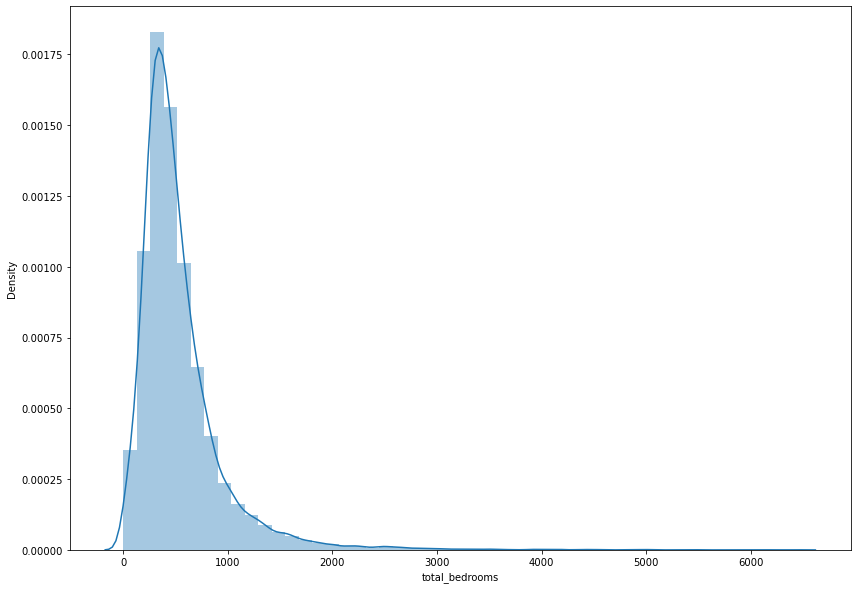

In [7]:
plt.figure(figsize=(14,10))
sns.distplot(df['total_bedrooms'])

In [8]:
fill = df['total_bedrooms'].dropna()
df['total_bedrooms'] = df['total_bedrooms'].fillna(pd.Series(np.random.choice(fill,size = len(df.index))))

In [9]:
df['total_bedrooms'].isna().sum()

0

/Users/glikithvinayaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

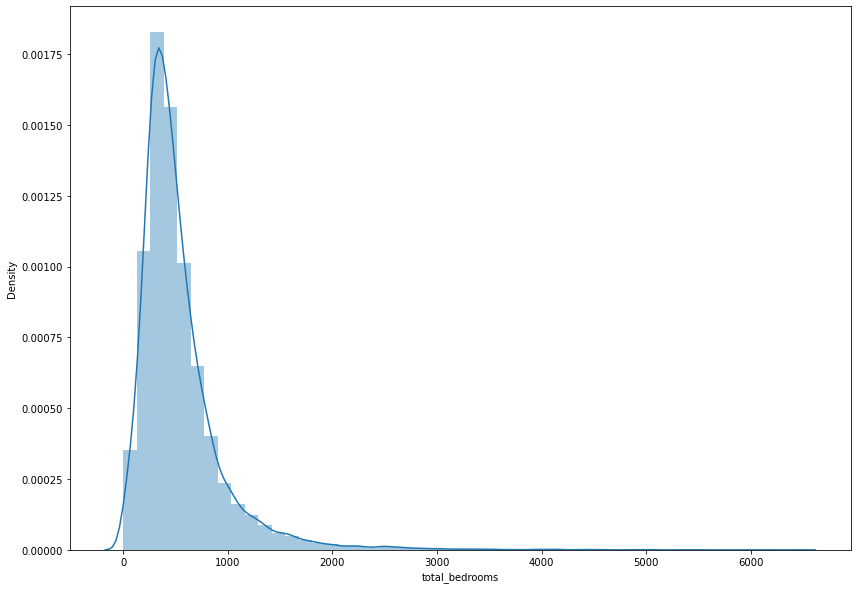

In [10]:
plt.figure(figsize=(14,10))
sns.distplot(df['total_bedrooms'])

## Filling missing values has not changed the distribution of data, which is a good indication that filling will not have no negative impact on the data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

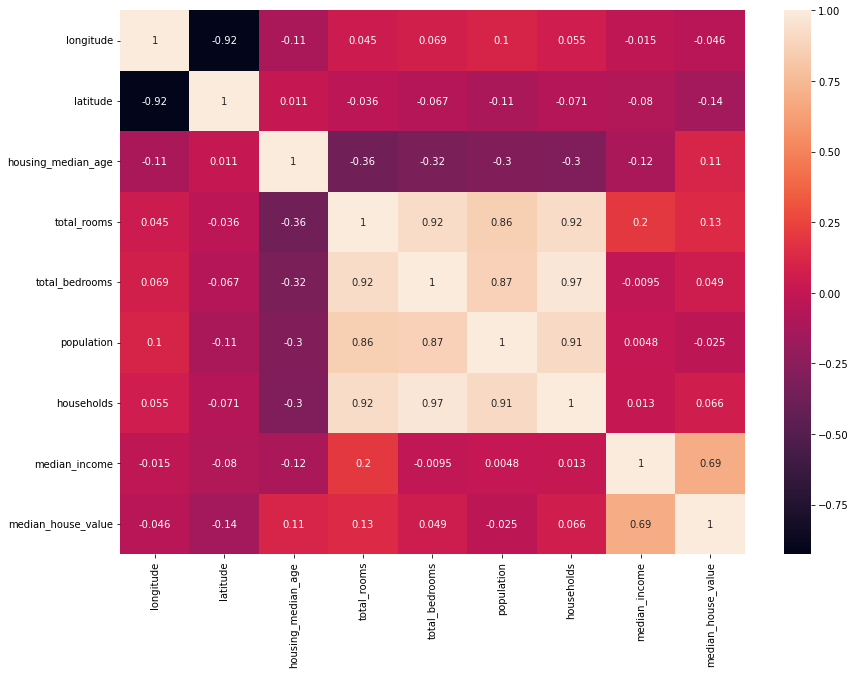

In [12]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

## From the heatmap it is evident that there is collinearity between models, which can have a negative affect on the model

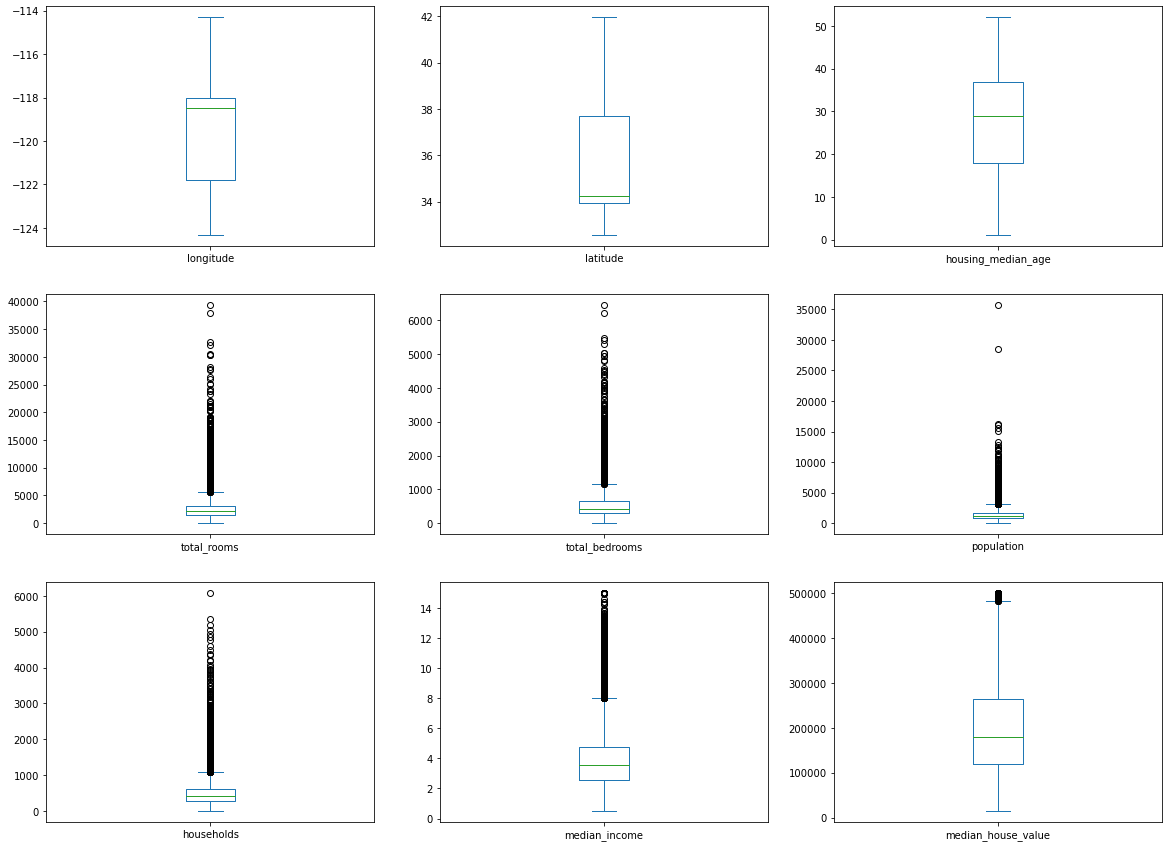

In [13]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(20,15))
plt.show()

## From the boxplots we can observe that total_rooms, total_bedrooms, population, households, median_income, median_house_value have outliers

## Let us first deal with outliers

/Users/glikithvinayaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


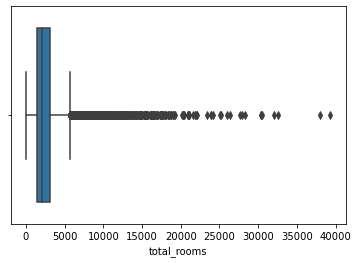

/Users/glikithvinayaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


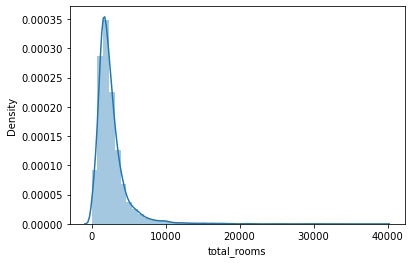

/Users/glikithvinayaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


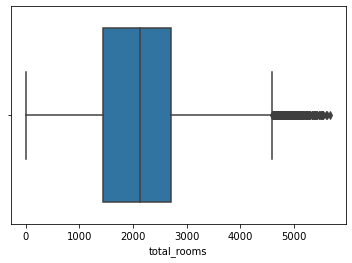

/Users/glikithvinayaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


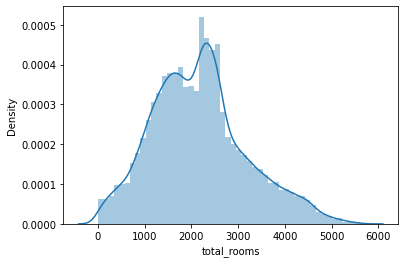

In [14]:
df_copy = df.copy()
sns.boxplot(df_copy['total_rooms'])
plt.show()
sns.distplot(df_copy['total_rooms'])
plt.show()
for i in df_copy['total_rooms']:
    q1 = df_copy['total_rooms'].quantile(0.25)
    q3 = df_copy['total_rooms'].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (1.5*iqr)
    upper_limit = q3 + (1.5*iqr)
    if i>upper_limit or i<lower_limit:
        df_copy['total_rooms'] = df_copy['total_rooms'].replace(i,np.mean(df_copy['total_rooms']))

sns.boxplot(df_copy['total_rooms'])
plt.show()
sns.distplot(df_copy['total_rooms'])
plt.show()

## We can observe that replacing outliers with mean values has reduced the total number of outliers in the data and has made it a normal distribution which is a good indication that handling outliers was a good step

In [15]:
df_copy = df.copy()
for i in df_copy[['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]:
    for j in df_copy[i]:
        q1 = df_copy[i].quantile(0.25)
        q3 = df_copy[i].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - (1.5*iqr)
        upper_limit = q3 + (1.5*iqr)
        if j>upper_limit or j<lower_limit:
            df_copy[i] = df_copy[i].replace(j, np.mean(df_copy[i]))
df_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880.000000,129.000000,322.0,126.00000,3.870671,NEAR BAY,186188.8915
1,-122.22,37.86,21,2635.763081,484.977516,2401.0,499.53968,3.870455,NEAR BAY,358500.0000
2,-122.24,37.85,52,1467.000000,190.000000,496.0,177.00000,7.257400,NEAR BAY,352100.0000
3,-122.25,37.85,52,1274.000000,235.000000,558.0,219.00000,5.643100,NEAR BAY,341300.0000
4,-122.25,37.85,52,1627.000000,280.000000,565.0,259.00000,3.846200,NEAR BAY,342200.0000


/Users/glikithvinayaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


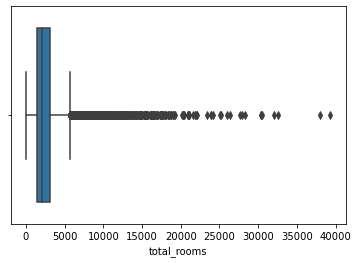

/Users/glikithvinayaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


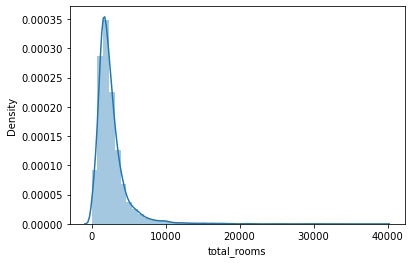

/Users/glikithvinayaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


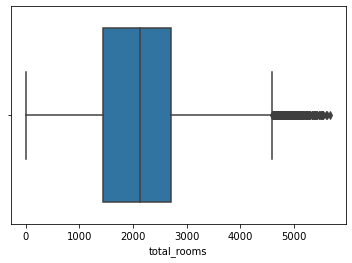

/Users/glikithvinayaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


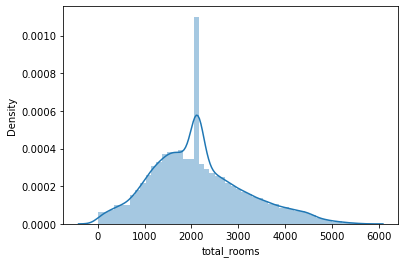

In [16]:
df_copy1 = df.copy()
sns.boxplot(df_copy1['total_rooms'])
plt.show()
sns.distplot(df_copy1['total_rooms'])
plt.show()
for i in df_copy1['total_rooms']:
    q1 = df_copy1['total_rooms'].quantile(0.25)
    q3 = df_copy1['total_rooms'].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (1.5*iqr)
    upper_limit = q3 + (1.5*iqr)
    if i>upper_limit or i<lower_limit:
        df_copy1['total_rooms'] = df_copy1['total_rooms'].replace(i, np.median(df_copy1['total_rooms']))

sns.boxplot(df_copy1['total_rooms'])
plt.show()
sns.distplot(df_copy1['total_rooms'])
plt.show()

## When we use median to replace the outliers, it leaves quite a lot of outliers. Whereas mean function handled most of the outliers in the data.
## But the distribution in both models has been changed and not scaled which can have a negative impact on the model.

## Modelling Process

In [17]:
#Label Encoding for Ocean Proximity
le_encode = LabelEncoder()
df['ocean_proximity'] = le_encode.fit_transform(df['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [18]:
def modelling(df):
    x=df.drop('median_house_value',axis=1).values
    y=df['median_house_value'].values
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    
    lr = LinearRegression()
    r = Ridge()
    l = Lasso(alpha=0.9)
    rfr = RandomForestRegressor()
    dt = DecisionTreeRegressor()
    
    lr.fit(x_train, y_train)
    r.fit(x_train, y_train)
    l.fit(x_train, y_train)
    rfr.fit(x_train, y_train)
    dt.fit(x_train, y_train)
    
    lrpred = lr.predict(x_test)
    rpred = r.predict(x_test)
    lpred = l.predict(x_test)
    rfrpred = rfr.predict(x_test)
    dtpred = dt.predict(x_test)
    
    lrscore = lr.score(x_train, y_train), lr.score(x_test, y_test)
    rscore = r.score(x_train, y_train), r.score(x_test, y_test)
    lscore = l.score(x_train, y_train), l.score(x_test, y_test)
    rfrscore = rfr.score(x_train, y_train), rfr.score(x_test, y_test)
    dtscore = dt.score(x_train, y_train), dt.score(x_test, y_test)
    
    return lrpred, rpred, lpred, rfrpred, dtpred, lrscore, rscore, lscore, rfrscore, dtscore, y_test

### Modelling actual data which has not been dealt with for outliers

In [19]:
lrpred, rpred, lpred, rfrpred, dtpred, lrscore, rscore, lscore, rfrscore, dtscore, y_test = modelling(df)

## Score of different models 

In [20]:
print("-----------------------------------------")
print("-----------Linear Regression-------------")
print(lrscore)
print("-----------------------------------------")
print("-----------------Ridge-------------------")
print(rscore)
print("-----------------------------------------")
print("-----------------Lasso-------------------")
print(lscore)
print("-----------------------------------------")
print("--------------Random Forest--------------")
print(rfrscore)
print("-----------------------------------------")
print("--------------Decision Tree--------------")
print(dtscore)

-----------------------------------------
-----------Linear Regression-------------
(0.6374932001456142, 0.6222292959146338)
-----------------------------------------
-----------------Ridge-------------------
(0.6374931958713265, 0.6222330182929738)
-----------------------------------------
-----------------Lasso-------------------
(0.6374931996072861, 0.6222308246311631)
-----------------------------------------
--------------Random Forest--------------
(0.9747445460069005, 0.8094027667927994)
-----------------------------------------
--------------Decision Tree--------------
(1.0, 0.6671188095117611)


## Comparing between the actual data and the data which the models predicted

In [21]:
lrdf = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': lrpred})
rdf = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': rpred})
ldf = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': lpred})
rfrdf = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': rfrpred})
dtdf = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': dtpred})

print("-------------------------------------")
print("---------Linear Regression-----------")
print(lrdf.head(10))
print("-------------------------------------")
print("---------------Ridge-----------------")
print(rdf.head(10))
print("-------------------------------------")
print("---------------Lasso-----------------")
print(ldf.head(10))
print("-------------------------------------")
print("-----------Random Forest-------------")
print(rfrdf.head(10))
print("-------------------------------------")
print("-----------Decision Tree-------------")
print(dtdf.head(10))

-------------------------------------
---------Linear Regression-----------
   Actual Data  Predicted Data
0        47700    27655.687221
1        45800   143928.371267
2       500001   333138.543898
3       218600   213399.355326
4       278000   265649.191642
5       158700   144721.344974
6       198200   313159.934961
7       157500   178226.749000
8       340000   286924.010605
9       446600   466141.887153
-------------------------------------
---------------Ridge-----------------
   Actual Data  Predicted Data
0        47700    27667.931721
1        45800   143928.171852
2       500001   333135.829886
3       218600   213400.023726
4       278000   265637.791690
5       158700   144733.982298
6       198200   313152.892253
7       157500   178228.811988
8       340000   286913.370857
9       446600   466136.140843
-------------------------------------
---------------Lasso-----------------
   Actual Data  Predicted Data
0        47700    27659.997871
1        45800   143928.2685

In [22]:
def actual_pred_plot(df, title):
    plt.figure(figsize=(14,6))
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    plt.plot(df[:50])
    plt.legend(['Actual','Predicted'])
    plt.title(title)
    plt.show()

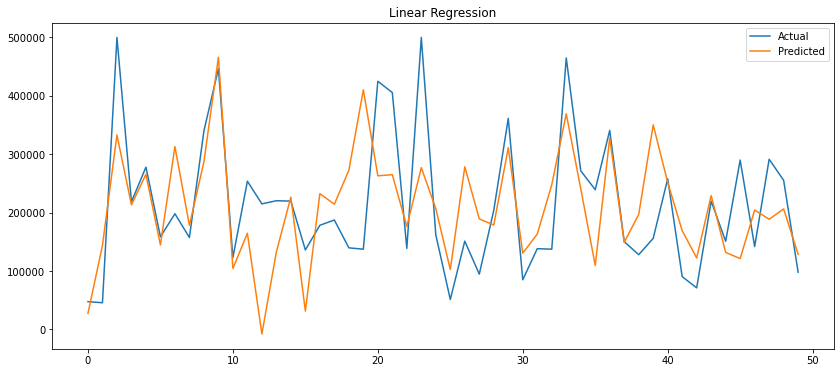

In [23]:
actual_pred_plot(lrdf, 'Linear Regression')

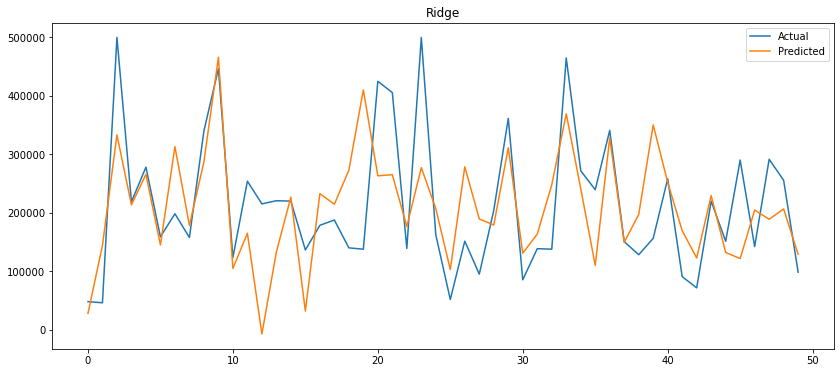

In [24]:
actual_pred_plot(rdf, 'Ridge')

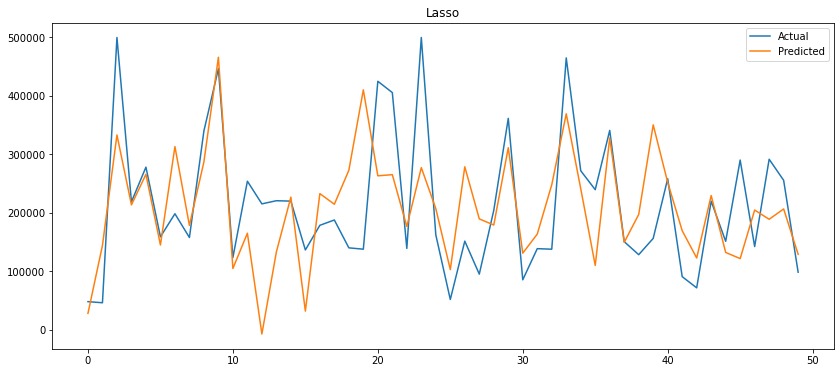

In [25]:
actual_pred_plot(ldf, 'Lasso')

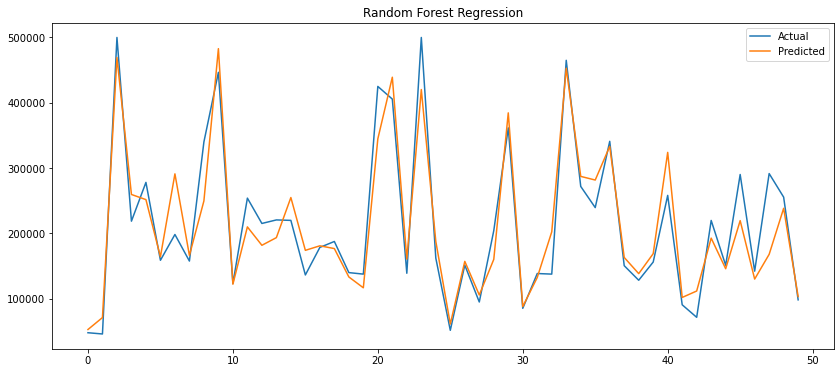

In [26]:
actual_pred_plot(rfrdf, 'Random Forest Regression')

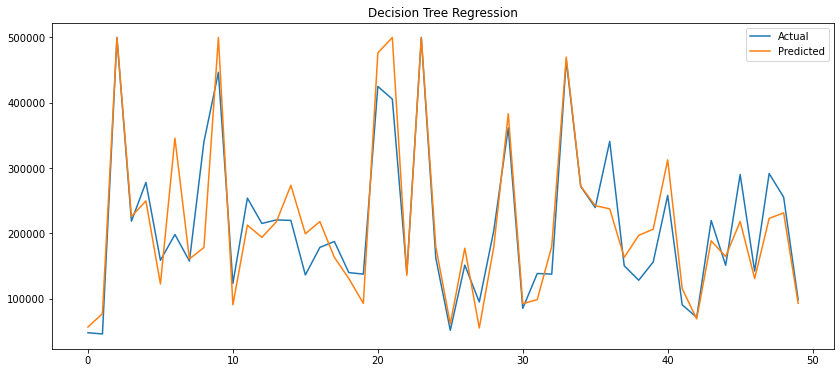

In [27]:
actual_pred_plot(dtdf, 'Decision Tree Regression')

## Models Evaluation

In [28]:
def models_evaluation(df, model_name):
    print("-------------------------------")
    print(model_name)
    print("R-Squared:", r2_score(df["Actual Data"], df["Predicted Data"]))
    print("MAE:", mean_absolute_error(df["Actual Data"], df["Predicted Data"]))
    print("MSE:", mean_squared_error(df["Actual Data"], df["Predicted Data"]))
    print("MAE%:", mean_absolute_percentage_error(df["Actual Data"], df["Predicted Data"]))
    print("-------------------------------")

In [29]:
models_evaluation(lrdf, 'Linear Regression')

-------------------------------
Linear Regression
R-Squared: 0.6222292959146338
MAE: 51708.43408210429
MSE: 4998730351.515322
MAE%: 0.3121468723601023
-------------------------------


In [30]:
models_evaluation(rdf, 'Ridge')

-------------------------------
Ridge
R-Squared: 0.6222330182929738
MAE: 51708.11766760705
MSE: 4998681096.331192
MAE%: 0.312143791441329
-------------------------------


In [31]:
models_evaluation(ldf, 'Lasso')

-------------------------------
Lasso
R-Squared: 0.6222308246311631
MAE: 51708.31155310049
MSE: 4998710123.261433
MAE%: 0.312145840713221
-------------------------------


In [32]:
models_evaluation(rfrdf, 'Random Forest Regression')

-------------------------------
Random Forest Regression
R-Squared: 0.8094027667927994
MAE: 32159.089368217057
MSE: 2522017097.261154
MAE%: 0.18079510846647553
-------------------------------


In [33]:
models_evaluation(dtdf, 'Decision Tree Regression')

-------------------------------
Decision Tree Regression
R-Squared: 0.6671188095117611
MAE: 41882.91007751938
MSE: 4404744180.3906975
MAE%: 0.2292855004086502
-------------------------------


## Modelling actual data which has been dealt with for outliers

In [35]:
#Label Encoding for Ocean Proximity
le_encode = LabelEncoder()
df_copy['ocean_proximity'] = le_encode.fit_transform(df_copy['ocean_proximity'])
df_copy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880.000000,129.000000,322.0,126.00000,3.870671,3,186188.8915
1,-122.22,37.86,21,2635.763081,484.977516,2401.0,499.53968,3.870455,3,358500.0000
2,-122.24,37.85,52,1467.000000,190.000000,496.0,177.00000,7.257400,3,352100.0000
3,-122.25,37.85,52,1274.000000,235.000000,558.0,219.00000,5.643100,3,341300.0000
4,-122.25,37.85,52,1627.000000,280.000000,565.0,259.00000,3.846200,3,342200.0000


In [36]:
lrpred, rpred, lpred, rfrpred, dtpred, lrscore, rscore, lscore, rfrscore, dtscore, y_test = modelling(df_copy)

## Scores of Different Models

In [37]:
print("-----------------------------------------")
print("-----------Linear Regression-------------")
print(lrscore)
print("-----------------------------------------")
print("-----------------Ridge-------------------")
print(rscore)
print("-----------------------------------------")
print("-----------------Lasso-------------------")
print(lscore)
print("-----------------------------------------")
print("--------------Random Forest--------------")
print(rfrscore)
print("-----------------------------------------")
print("--------------Decision Tree--------------")
print(dtscore)

-----------------------------------------
-----------Linear Regression-------------
(0.49933489606737147, 0.5024458109859082)
-----------------------------------------
-----------------Ridge-------------------
(0.4993348886050102, 0.5024446188814825)
-----------------------------------------
-----------------Lasso-------------------
(0.4993348950184221, 0.5024453727530569)
-----------------------------------------
--------------Random Forest--------------
(0.9572805374146642, 0.7089530708382841)
-----------------------------------------
--------------Decision Tree--------------
(1.0, 0.4202185695753212)


### Comparing between the actual data and the data which the models predicted

In [38]:
lrdf = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': lrpred})
rdf = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': rpred})
ldf = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': lpred})
rfrdf = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': rfrpred})
dtdf = pd.DataFrame({'Actual Data': y_test, 'Predicted Data': dtpred})

print("-------------------------------------")
print("---------Linear Regression-----------")
print(lrdf.head(10))
print("-------------------------------------")
print("---------------Ridge-----------------")
print(rdf.head(10))
print("-------------------------------------")
print("---------------Lasso-----------------")
print(ldf.head(10))
print("-------------------------------------")
print("-----------Random Forest-------------")
print(rfrdf.head(10))
print("-------------------------------------")
print("-----------Decision Tree-------------")
print(dtdf.head(10))

-------------------------------------
---------Linear Regression-----------
     Actual Data  Predicted Data
0   47700.000000    67951.275811
1   45800.000000   164165.094554
2  206855.816909   221519.971580
3  218600.000000   237979.198379
4  278000.000000   239709.413425
5  158700.000000   181412.541596
6  198200.000000   248043.383377
7  157500.000000   178484.786052
8  340000.000000   253310.823739
9  189741.040599   204338.373493
-------------------------------------
---------------Ridge-----------------
     Actual Data  Predicted Data
0   47700.000000    67961.850561
1   45800.000000   164164.138421
2  206855.816909   221515.623990
3  218600.000000   237978.854352
4  278000.000000   239699.338721
5  158700.000000   181423.025259
6  198200.000000   248038.654385
7  157500.000000   178486.062321
8  340000.000000   253300.835571
9  189741.040599   204337.933587
-------------------------------------
---------------Lasso-----------------
     Actual Data  Predicted Data
0   47700.000

### Ploting Acutal & Predicted Values for Different Models

In [39]:
def actual_pred_plot(df, title):
    plt.figure(figsize=(14,6))
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    plt.plot(df[:50])
    plt.legend(['Actual','Predicted'])
    plt.title(title)
    plt.show()

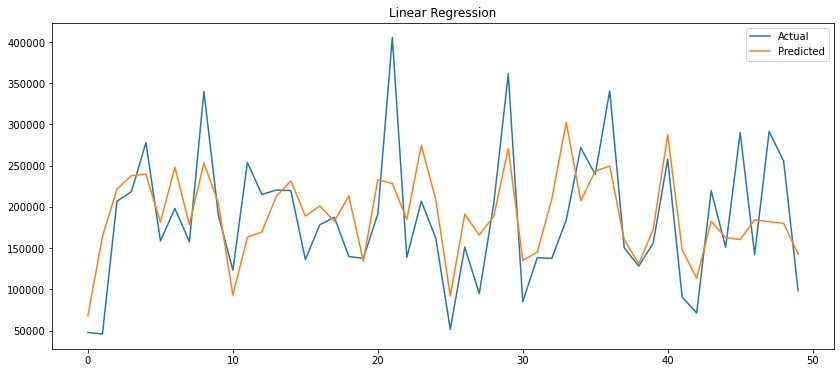

In [40]:
actual_pred_plot(lrdf, 'Linear Regression')

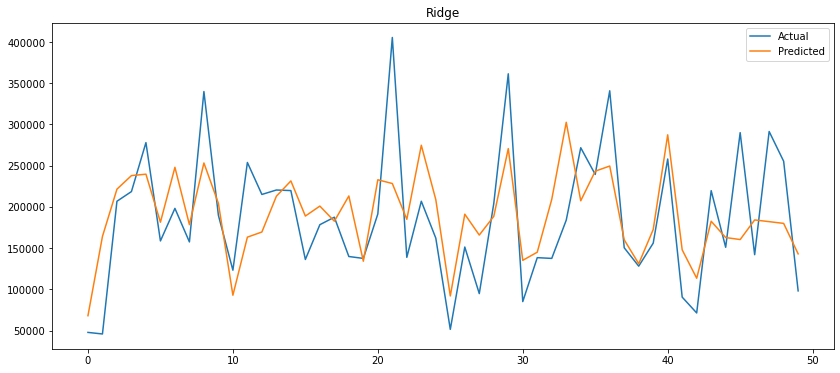

In [41]:
actual_pred_plot(rdf, 'Ridge')

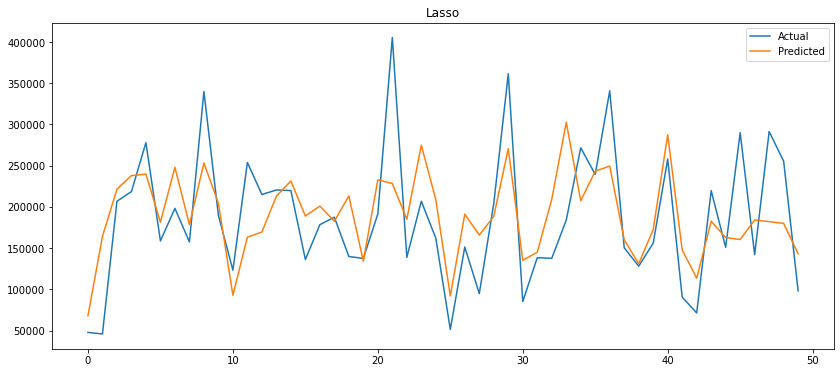

In [42]:
actual_pred_plot(ldf, 'Lasso')

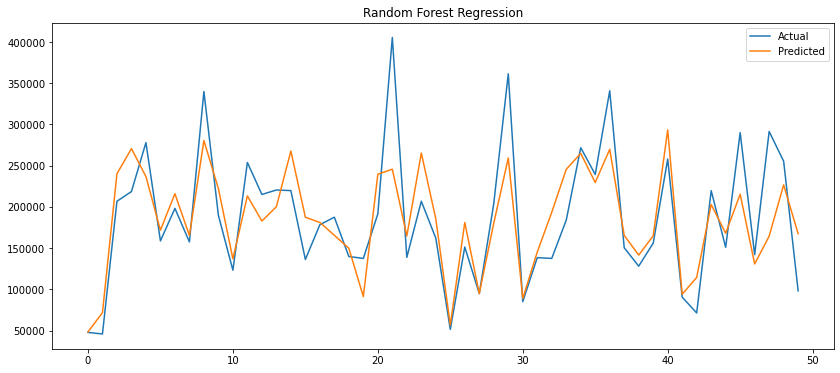

In [43]:
actual_pred_plot(rfrdf, 'Random Forest Regression')

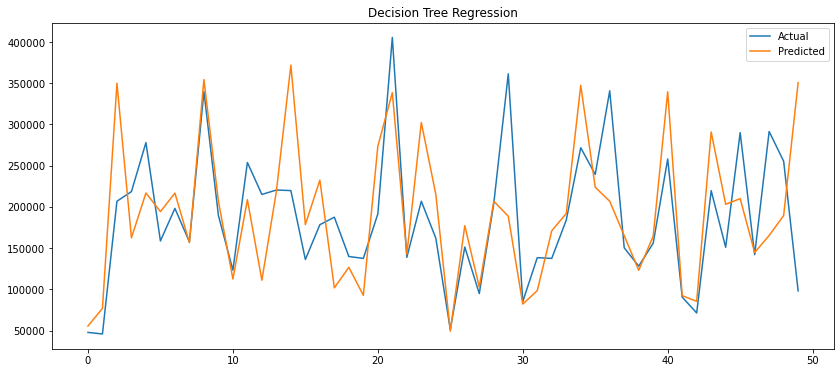

In [44]:
actual_pred_plot(dtdf, 'Decision Tree Regression')

## Models Evaluation

In [48]:
def models_evaluation(df, model_name):
    print('-------------------------------')
    print(model_name)
    print('R-Squared:', r2_score(df['Actual Data'], df['Predicted Data']))
    print('MAE:', mean_absolute_error(df['Actual Data'], df['Predicted Data']))
    print('MSE:', mean_squared_error(df['Actual Data'], df['Predicted Data']))
    print('MAE%:', mean_absolute_percentage_error(df['Actual Data'], df['Predicted Data']))
    print("-------------------------------")

In [49]:
models_evaluation(lrdf, 'Linear Regression')

-------------------------------
Linear Regression
R-Squared: 0.5024458109859082
MAE: 43557.64048733273
MSE: 3304831926.6650877
MAE%: 0.286249855110382
-------------------------------


In [50]:
models_evaluation(rdf, 'Ridge')

-------------------------------
Ridge
R-Squared: 0.5024446188814825
MAE: 43557.71337975395
MSE: 3304839844.8071775
MAE%: 0.2862517559508961
-------------------------------


In [51]:
models_evaluation(ldf, 'Lasso')

-------------------------------
Lasso
R-Squared: 0.5024453727530569
MAE: 43557.676628018584
MSE: 3304834837.4755087
MAE%: 0.2862508473381591
-------------------------------


In [52]:
models_evaluation(rfrdf, "Random Forest Regression")

-------------------------------
Random Forest Regression
R-Squared: 0.7089530708382841
MAE: 30645.23162289474
MSE: 1933178746.9369066
MAE%: 0.18336262998743091
-------------------------------


In [53]:
models_evaluation(dtdf, "Decision Tree Regression")

-------------------------------
Decision Tree Regression
R-Squared: 0.4202185695753212
MAE: 41453.77657214057
MSE: 3850997989.890834
MAE%: 0.24119217451086802
-------------------------------


## Conclusion That the Random Forest Model is the Model which has the High Accuracy and Fitted the Data The Best